In [65]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [66]:
df_ind=df[(df['job_title']=='Data Scientist')&(df['job_country']=='India')]


In [67]:
df_ind['job_posted_month_no']=df_ind['job_posted_date'].dt.month

C:\Users\ZONE\AppData\Local\Temp\ipykernel_8828\3215816051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind['job_posted_month_no']=df_ind['job_posted_date'].dt.month


In [68]:
df_ind_explode=df_ind.explode('job_skills')

In [69]:
df_ind_pivot= df_ind_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_ind_pivot.loc['Total']=df_ind_pivot.sum()

In [70]:
df_ind_pivot = df_ind_pivot[df_ind_pivot.loc['Total'].sort_values(ascending=False).index].drop('Total')

In [71]:
df_totals=df_ind.groupby('job_posted_month_no').size()

In [72]:
df_ind_percent=df_ind_pivot.div(df_totals/100,axis=0)
df_ind_percent

job_skills,python,sql,r,tableau,aws,tensorflow,spark,azure,pytorch,hadoop,...,ionic,vue.js,sqlite,haskell,groovy,trello,sass,terminal,clickup,laravel
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,79.357798,52.752294,40.137615,20.412844,25.458716,20.871560,19.495413,18.807339,11.467890,17.660550,...,0.229358,0.229358,0.000000,0.00000,0.000000,0.00000,0.229358,0.00000,0.000000,0.000000
2,75.298805,47.410359,39.840637,22.310757,19.123506,20.717131,16.733068,15.936255,17.131474,17.529880,...,0.000000,0.000000,0.398406,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
3,78.859060,54.697987,37.919463,25.838926,19.127517,19.463087,20.805369,16.107383,14.093960,12.080537,...,0.000000,0.000000,0.000000,0.33557,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
4,77.319588,59.793814,38.487973,28.522337,24.742268,21.993127,19.243986,16.838488,18.556701,13.745704,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
5,76.326531,52.244898,31.428571,21.224490,26.530612,21.632653,15.510204,19.591837,18.367347,11.020408,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
6,84.308511,47.340426,40.425532,18.085106,17.819149,20.478723,17.553191,14.893617,16.223404,13.829787,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
7,71.428571,53.416149,37.577640,19.875776,18.012422,19.875776,16.149068,14.906832,17.080745,14.285714,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
8,74.351585,51.296830,39.193084,25.648415,22.190202,17.002882,21.037464,17.002882,14.985591,14.985591,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.288184,0.000000
9,79.220779,49.025974,35.714286,19.805195,23.701299,22.402597,20.454545,22.727273,18.506494,15.584416,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000


In [79]:
df_ind_percent=df_ind_percent.reset_index()
df_ind_percent['job_posted_month']=df_ind_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_ind_percent=df_ind_percent.set_index('job_posted_month')

In [81]:
df_ind_percent=df_ind_percent.drop(columns='job_posted_month_no')

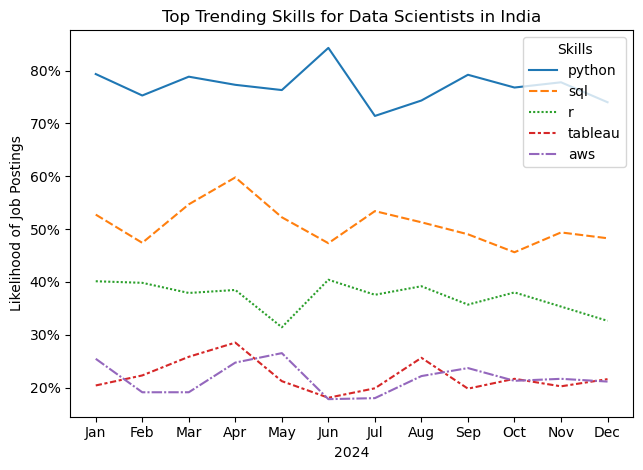

In [90]:
df_plot=df_ind_percent.iloc[:, :5]
sns.lineplot(data=df_plot)
plt.title('Top Trending Skills for Data Scientists in India')
plt.ylabel('Likelihood of Job Postings')
plt.xlabel('2024')
plt.legend(title='Skills')
plt.tight_layout()

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter())